In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))
# here i am commenting this part as it is very huge list
        



In [2]:
# ! pwd
import os
dataset_dir = '/kaggle/input/gtsrb-german-traffic-sign'
os.listdir(dataset_dir)

['Meta',
 'meta',
 'Meta.csv',
 'Train.csv',
 'Test.csv',
 'Test',
 'test',
 'Train',
 'train']

In [3]:
#useful libraries imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
Meta = os.path.join(dataset_dir, 'Meta')
# os.listdir(Meta)
#it contains number of classes of an image
Test = os.path.join(dataset_dir, 'Test')
# os.listdir(Test)[:10]
#test contains the images for our work
Train = os.path.join(dataset_dir, 'Train')


(46, 44, 3)

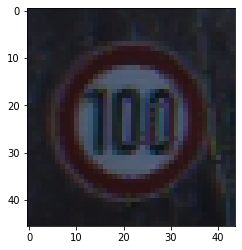

In [5]:
random_image = os.path.join(Train+'/7', os.listdir(Train+'/7')[0])
img = plt.imread(random_image)
plt.imshow(img)
img.shape

In [6]:
num_classes = len(os.listdir(Train))
num_classes

43

In [7]:
os.listdir(Train)
#it contains images corresponding to a particular label
# lets combine them all and its labels in a single array for easy access
images = []
labels = []
for label in os.listdir(Train):
    images_for_label = os.path.join(Train, label)
    for image in os.listdir(images_for_label):
        image = plt.imread(os.path.join(images_for_label, image))
        image = cv2.resize(image, (32, 32))
        images.append(image)
        labels.append(label)



In [8]:
images = np.array(images)
labels = np.array(labels, dtype='int32')
images.shape

(39209, 32, 32, 3)

In [9]:
labels.shape

(39209,)

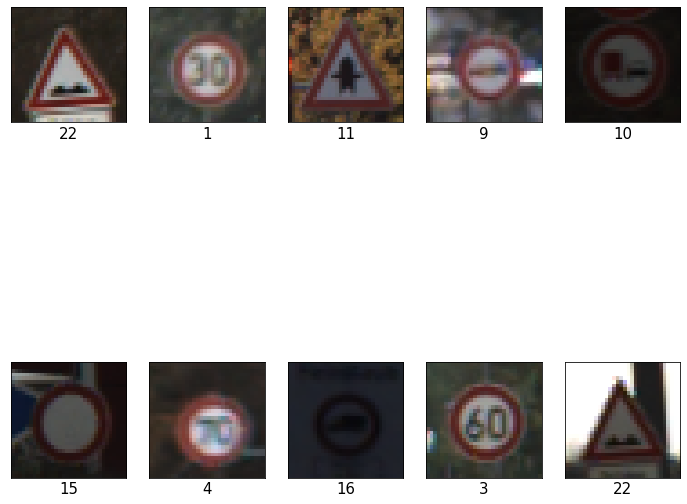

In [10]:
#lets plot some of the images
fig = plt.figure(figsize=(12, 12))
for i in range(10):
    random_num = np.random.randint(0, 39209)
    ax = fig.add_subplot(2, 5, i+1)
    plt.axis()
    plt.xticks([])
    plt.yticks([])
    ax.set_xlabel(xlabel = labels[random_num], fontsize=15)
    ax.imshow(images[random_num])

In [11]:
#splitting training and validation data
X_train, X_valid, y_train, y_valid = train_test_split(images, labels, random_state=0, stratify=labels, test_size=0.10)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [12]:
#lets plot our model architecture
model = Sequential()
#Convolution and Maxpooling layers for feature extraction
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

#Densely connected network
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [13]:
!pwd

/kaggle/working


In [14]:
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="/kaggle/working/logs",
    monitor='val_acc',
    verbose=0,
    save_best_only=True
)

In [15]:
#compiling and training model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    callbacks=[modelCheckpoint],
    validation_data=(X_valid, y_valid),
    epochs=10
)

Epoch 1/10
1103/1103 [==============================] - 15s 9ms/step - loss: 2.0141 - accuracy: 0.4234 - val_loss: 0.1311 - val_accuracy: 0.9612
Epoch 2/10
1103/1103 [==============================] - 10s 9ms/step - loss: 0.1442 - accuracy: 0.9571 - val_loss: 0.0375 - val_accuracy: 0.9878
Epoch 3/10
1103/1103 [==============================] - 9s 8ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 4/10
1103/1103 [==============================] - 8s 8ms/step - loss: 0.0417 - accuracy: 0.9871 - val_loss: 0.0333 - val_accuracy: 0.9893
Epoch 5/10
1103/1103 [==============================] - 9s 8ms/step - loss: 0.0341 - accuracy: 0.9907 - val_loss: 0.0459 - val_accuracy: 0.9860
Epoch 6/10
1103/1103 [==============================] - 9s 8ms/step - loss: 0.0362 - accuracy: 0.9899 - val_loss: 0.0322 - val_accuracy: 0.9911
Epoch 7/10
1103/1103 [==============================] - 9s 8ms/step - loss: 0.0255 - accuracy: 0.9933 - val_loss: 0.0551 - val_accurac

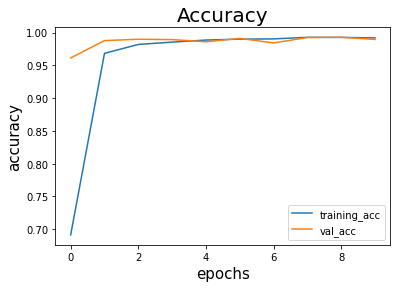

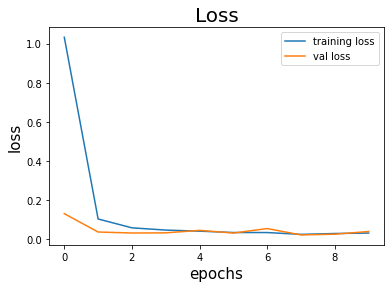

In [16]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy', fontsize=20)
plt.xlabel('epochs', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss', fontsize=20)
plt.xlabel('epochs', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.legend()


In [17]:
#Evaluating our results
df = pd.read_csv(os.path.join(dataset_dir, 'Test.csv'))
df.head()
#here classId referes to the label and path as image
test_images = []
test_labels = []

for i in range(df.shape[0]):
    label = df.ClassId[i]
    image_path_test = df.Path[i]
    image_path = os.path.join(dataset_dir, image_path_test)
    image = plt.imread(image_path)
    image = cv2.resize(image, (32, 32))
    test_images.append(image)
    test_labels.append(label)


In [18]:
test_images = np.array(test_images)
test_labels = to_categorical(np.array(test_labels))

In [19]:
model.evaluate(test_images, test_labels)
model.save('traffic_signal_classifier.h5')

395/395 [==============================] - 3s 6ms/step - loss: 0.2445 - accuracy: 0.9510
